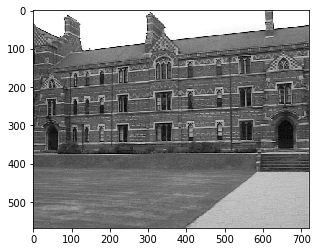

In [1]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import data, feature, color, img_as_float
from skimage.feature import corner_peaks
from skimage.io import imread
img = imread('building1.jpg')
imggray = rgb2gray(img)
h, w = imggray.shape
plt.imshow(imggray, cmap="gray")
plt.show()

In [0]:
from scipy import signal as sig
import numpy as np
def harris_detect(imggray):
  kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
  kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  I_x = sig.convolve2d(imggray, kernel_x, mode='same')
  I_y = sig.convolve2d(imggray, kernel_y, mode='same')
  Ixx = ndimage.gaussian_filter(I_x**2, sigma=1)
  Ixy = ndimage.gaussian_filter(I_y*I_x, sigma=1)
  Iyy = ndimage.gaussian_filter(I_y**2, sigma=1)
  k = 0.05
  detA = Ixx * Iyy - Ixy ** 2
  traceA = Ixx + Iyy  
  harris_response = detA - k * traceA ** 2
  corners = []
  bound = 3
  for i in range(bound,h-bound):
    for j in range(bound,w-bound):
      found = 0
      if(harris_response[i][j]>0.01*harris_response.max()):
          for x in range(-bound,bound+1):
            for y in range(-bound,bound+1):
                if(harris_response[i][j]>=harris_response[i+x][j+y]):
                  found += 1
      if(found == 49):
       corners.append([i,j])
  corners = np.asarray(corners)
  return corners

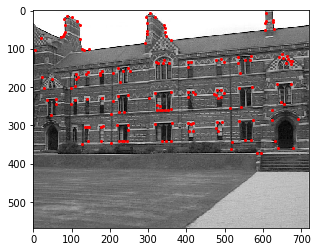

In [3]:
corners = harris_detect(imggray)
fig, ax = plt.subplots()
ax.imshow(imggray, cmap="gray")
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=4)

18


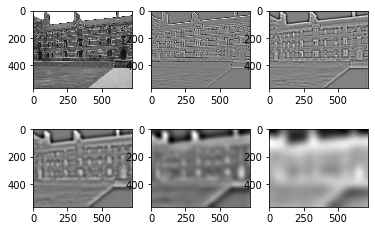

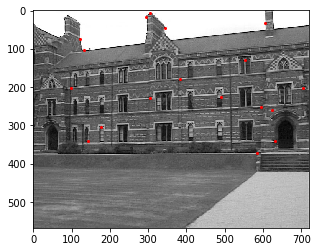

In [4]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
original_image = img_as_float(imread('building1.jpg'))
img = color.rgb2gray(original_image)
k = 2
plt.subplot(2,3,1)
plt.imshow(img, cmap="gray")
dogs = []
corners_arr = []
dogs.append(img)
corners = harris_detect(img)
corners_arr.append(corners)

for idx,sigma in enumerate([2.0,4.0,8.0,16.0,32.0]):
  s1 = ndimage.gaussian_filter(img,k*sigma)
  s2 = ndimage.gaussian_filter(img,sigma)
  dog = cv2.subtract(s1, s2)
  dogs.append(dog)
  corners = harris_detect(dog)
  corners_arr.append(corners)
  plt.subplot(2,3,idx+2)
  plt.imshow(dog,cmap="gray")

new_corners = []
for i in range(len(dogs)):
  for j in range(len(corners_arr[i])):
    maxim = 0
    for m in range(-1,2):
      for n in range(-1,2):
        if(i !=0):
          if(dogs[i][corners_arr[i][j][0]][corners_arr[i][j][1]]<dogs[i-1][corners_arr[i][j][0]+m][corners_arr[i][j][1]+n]):
            maxim = 1
        if(i !=5):
          if(dogs[i][corners_arr[i][j][0]][corners_arr[i][j][1]]<dogs[i+1][corners_arr[i][j][0]+m][corners_arr[i][j][1]+n]):
            maxim = 1
        if(m !=0 and n!=0):
          if(dogs[i][corners_arr[i][j][0]][corners_arr[i][j][1]]<dogs[i][corners_arr[i][j][0]+m][corners_arr[i][j][1]+n]):
            maxim = 1
    if(maxim == 0):
      new_corners.append(corners_arr[i][j])
    maxim = 0
    for m in range(-1,2):
      for n in range(-1,2):
       if(i !=0):   
          if(dogs[i][corners_arr[i][j][0]][corners_arr[i][j][1]]>dogs[i-1][corners_arr[i][j][0]+m][corners_arr[i][j][1]+n]):
            maxim = 1
       if(i !=5):
          if(dogs[i][corners_arr[i][j][0]][corners_arr[i][j][1]]>dogs[i+1][corners_arr[i][j][0]+m][corners_arr[i][j][1]+n]):
            maxim = 1
       if(m !=0 and n!=0):
          if(dogs[i][corners_arr[i][j][0]][corners_arr[i][j][1]]>dogs[i][corners_arr[i][j][0]+m][corners_arr[i][j][1]+n]):
            maxim = 1
    if(maxim == 0):
      new_corners.append(corners_arr[i][j])

print(len(new_corners))
corners = np.array(new_corners)
fig, ax = plt.subplots()
ax.imshow(dogs[0], cmap="gray")
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=4)

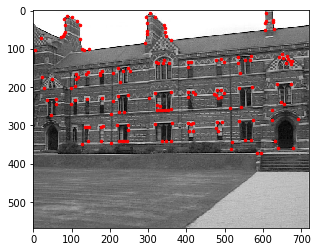

In [5]:
image1 = img_as_float(imread('building1.jpg'))
image1 = color.rgb2gray(image1)
corners1 = harris_detect(image1)
fig, ax = plt.subplots()
ax.imshow(image1, cmap="gray")
ax.plot(corners1[:, 1], corners1[:, 0], '.r', markersize=5)

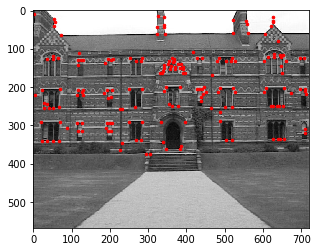

In [6]:
image2 = img_as_float(imread('building2.jpg'))
image2 = color.rgb2gray(image2)
corners2 = harris_detect(image2)
fig, ax = plt.subplots()
ax.imshow(image2, cmap="gray")
ax.plot(corners2[:, 1], corners2[:, 0], '.r', markersize=5)

In [7]:
import pandas as pd
difs = []
for corner1 in corners1:
  for corner2 in corners2:
    dif = 0
    for m in range(-3,4):
        for n in range(-3,4):
          d1 = 0
          d2 = 0
          if(corner1[0]+m <=720 and corner1[0]+m>=0 and corner1[1]+n<=568 and corner1[1]+n>=0):
            d1 = image1[corner1[0]+m][corner1[1]+n]
          if(corner2[0]+m <=720 and corner2[0]+m>=0 and corner2[1]+n<=568 and corner2[1]+n>=0):
            d2 = image2[corner2[0]+m][corner2[1]+n]
          dif += (d2-d1)**2
    difs.append(dif)
difs = np.array(difs)
difs = difs.reshape(len(corners1), len(corners2))
print(difs)

difs_for_corners1 = np.sort(difs, axis=1)
args_for_corners1 = np.argsort(difs, axis=1)
difs_for_corners2 = np.sort(difs, axis=0)
args_for_corners2 = np.argsort(difs, axis=0)
ssds = []

#for i in range(len(corners1)):
#  k = difs_for_corners1[i][0]/difs_for_corners1[i][1]
#  j = args_for_corners1[i][0]
#  ssds.append([k,0,i,j])

for i in range(len(corners2)):
  k = difs_for_corners2[0][i]/difs_for_corners2[1][i]
  j = args_for_corners2[0][i]
  ssds.append([k,1,j,i])

ssds = pd.DataFrame(ssds)
ssds = ssds.sort_values(by = 0)
ssds =  pd.DataFrame(ssds)
ssds = ssds.to_numpy()

#print(len(corners1))
#print(len(corners2))
#print(difs_for_corners2)

[[19.14771661 21.55615275 23.21633678 ...  7.79980641  8.10599225
   8.53288866]
 [ 6.83270566  6.55829832 11.94361256 ... 11.9948689  12.4297408
  17.57549858]
 [ 9.15894703  8.1028383  13.45166794 ... 12.37016596 13.79968215
  16.26599974]
 ...
 [ 5.42851823  6.59518947 10.51522259 ...  0.0823377   0.81034664
   2.28984911]
 [19.14771661 21.55615275 23.21633678 ...  7.79980641  8.10599225
   8.53288866]
 [19.14771661 21.55615275 23.21633678 ...  7.79980641  8.10599225
   8.53288866]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


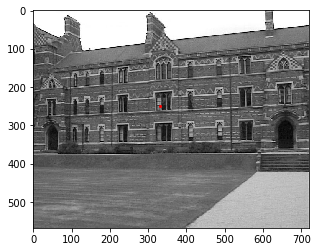

In [8]:
fig, ax = plt.subplots()
ax.imshow(image1, cmap="gray")
ax.plot(corners1[int(ssds[4,2])][1], corners1[int(ssds[4,2])][0] , '.r', markersize=4)

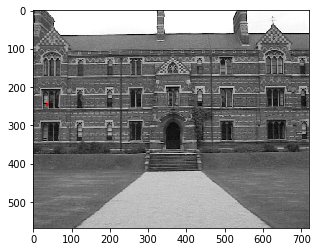

In [9]:
fig, ax = plt.subplots()
ax.imshow(image2, cmap="gray")
ax.plot(corners2[int(ssds[4,3])][1], corners2[int(ssds[4,3])][0] , '.r', markersize=4)

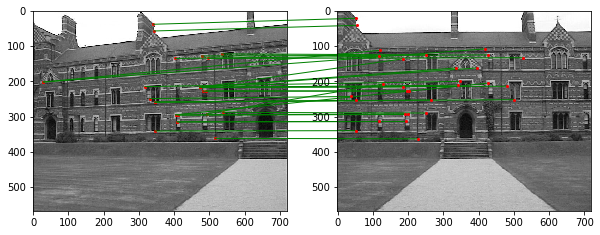

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
from matplotlib.pyplot import figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 10)) 
ax1.imshow(image1, cmap="gray")
ax2.imshow(image2, cmap="gray")
for i in range (30):
  ax1.plot(corners1[int(ssds[i,2])][1],corners1[int(ssds[i,2])][0], '.r', markersize=4)
  ax2.plot(corners2[int(ssds[i,3])][1],corners2[int(ssds[i,3])][0], '.r', markersize=4)
  con = ConnectionPatch(xyA=(corners2[int(ssds[i,3])][1],corners2[int(ssds[i,3])][0])
, xyB=(corners1[int(ssds[i,2])][1],corners1[int(ssds[i,2])][0]), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="green")
  ax2.add_artist(con)
plt.show()

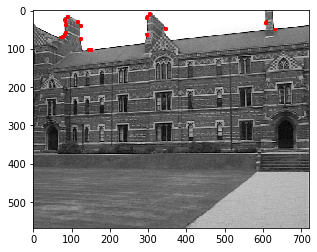

In [0]:
import cv2
import numpy as np
filename = 'b1.jpg'
img = cv2.imread(filename)
imggray = rgb2gray(img)
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(imggray)
dst = cv2.cornerHarris(gray,2,3,0.1)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
corners = corner_peaks(dst)
fig, ax = plt.subplots()
ax.imshow(imggray, cmap="gray")
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=4)